# Solution sketch, lab 14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns




In [2]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




In the dataset of consumption, you can also analyse consumption in Denmark. 
* Comparing consumption patterns between Denmark and Norway, how do they differ? How are they similar. 
* Model Danish consumption as a seasonal ARIMA model. Explain how you chose your specification. 
* Make a 30 day forecast of Danish consumption. Explain potential weaknesses of the forecast. What could you do to make it better? 



In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL



In [4]:
cons = pd.read_csv("http://jmaurit.github.io/analytics/labs/data/consumption-per-country_2019_daily.csv", sep=";")
cons

,date,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
0,01/01/2019,410564,383617,252819,84659,1131658,20707,17307,29757,67771
1,02/01/2019,454919,466157,284691,98864,1304636,25007,21458,35864,82329
2,03/01/2019,457991,473677,308267,104761,1294453,27478,22842,37754,88074
3,04/01/2019,429673,439736,293880,102569,1219124,27995,23287,38536,89818
4,05/01/2019,401216,415149,279979,89429,1185774,25275,20908,34831,81014
...,...,...,...,...,...,...,...,...,...,...
360,27/12/2019,460167,437592,241661,93113,1232536,24133,19943,32877,76953
361,28/12/2019,442388,441166,251740,92159,1227453,23841,19371,32318,75530
362,29/12/2019,394046,396131,231863,91624,1113664,23689,18901,31866,74456
363,30/12/2019,394922,389466,229510,96420,1110331,23980,19782,33985,77747


In [6]:
cons["date"] = pd.to_datetime(cons.date, format="%d/%m/%Y")
cons.set_index("date", inplace=True)

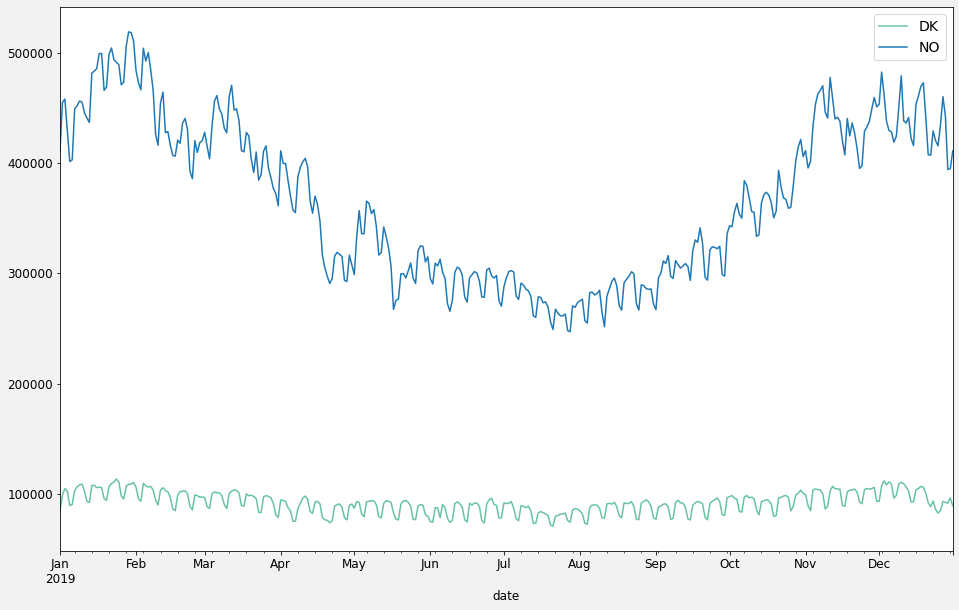

In [13]:
fig, ax = plt.subplots()
cons.DK.plot(ax=ax, label="DK")
cons.NO.plot(ax=ax, label="NO")
ax.legend()
plt.show()

Just visually we can see a few things. One is that Norway uses a lot more electricity than Denmark-between 4-5 times, depending on the season, even though they have roughly the same number of citizens. There are a few reasons for this. One is that Norway to a much greater degree uses electricity for heating, while Denmark relies much more heavily on district heating schemes. There is also more heavy industry in Norway that uses electricity as a major input–notably aluminium production.

We can also see a much more pronounced yearly seasonal pattern to the Norwegian data, again the fact that Norway uses electricity in heating explains this to a large degree. It also appears that the Danish weekly seasonality is considerably more regular than the Norwegian seasonality.

To find a good ARIMA specification, you should probably have looked at the ACF and pACF charts to get a first good guess. A seasonally differenced model is probably a good choice for DK data as well. Then some trial and error, comparing AIC/BIC values should lead to a good model. 

The model I came up with had ARMA(3,2) and seasonal ARIMA(0,1,1)(weekly seasonality)

In [14]:
arimaMod4 = ARIMA(cons.DK, order=(3,0,2), seasonal_order = (0,1,1,7)).fit()
arimaMod4.summary()

/Users/johannesmauritzen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/johannesmauritzen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/johannesmauritzen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/johannesmauritzen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive param

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                DK   No. Observations:                  365
Model:             ARIMA(3, 0, 2)x(0, 1, [1], 7)   Log Likelihood               -3430.614
Date:                           Sat, 27 Aug 2022   AIC                           6875.228
Time:                                   07:45:42   BIC                           6902.392
Sample:                               01-01-2019   HQIC                          6886.031
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3976      0.064      6.226      0.000       0.272       0.523
ar.L2          0.7829      0.106      7.359      0.000       0.574       0.991
ar.L3         -0.2553      0.066     -3.893      0.000      -0.384      -0.127
ma.L1          0.1308      0.055      2.391      0.017       0.024       0.238
ma.L2         -0.7232      0.060    -12.018      0.000      -0.841      -0.605
ma.S.L7       -0.5896      0.036    -16.477      0.000      -0.660      -0.519
sigma2      1.191e+07   7.07e-10   1.69e+16      0.000    1.19e+07    1.19e+07
===================================================================================
Ljung-Box (L1) (Q):                  18.84   Jarque-Bera (JB):               296.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.73e+32. Standard errors may be unstable.
"""

Now for the forecast

In [16]:
forecast_cons = arimaMod4.get_forecast(steps=30).summary_frame()
forecast_cons = forecast_cons.reset_index()
forecast_cons = forecast_cons.rename(columns = {"index":"date"})

<AxesSubplot:xlabel='date'>

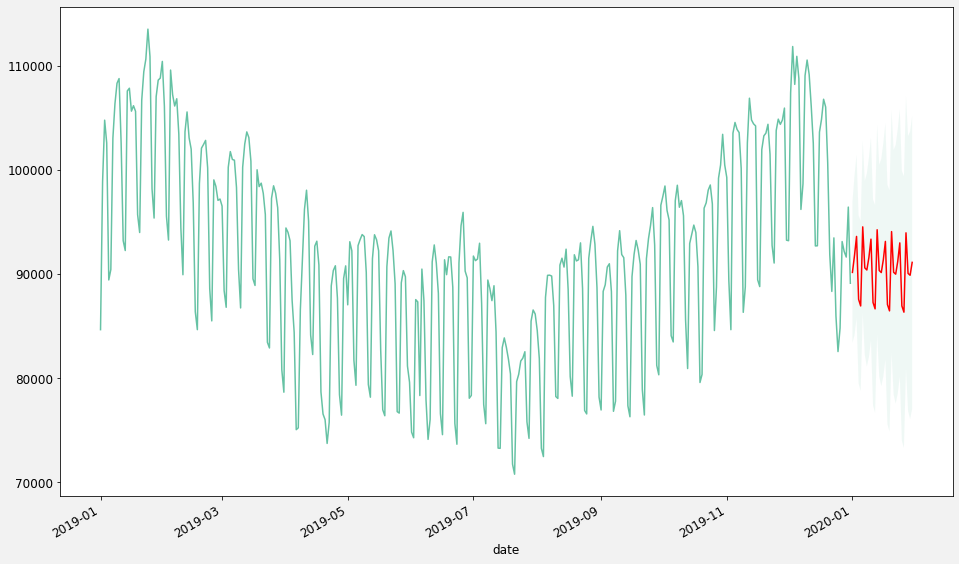

In [17]:
fig, ax = plt.subplots()
ax.plot(forecast_cons["date"], forecast_cons["mean"], color="red")
ax.fill_between(forecast_cons["date"], forecast_cons["mean_ci_lower"], forecast_cons["mean_ci_upper"], alpha=.1)
cons.DK.plot(ax=ax)